In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import neurokit2 as nk
import matplotlib.pyplot as plt

from read_record import Record,RecordReader,plot_signal_with_annotation
from scanning_window import scan_record
from collections import Counter
from transform_image import get_combined_beat_image

from neurokit2 import ecg_clean

In [2]:
#Select the folder name where the unprocessed ECG signal are located
folder_path=r"D:\ECG DB\LTAF_raw"

In [3]:
file_name="03" #select the record you want to process
reading_record=RecordReader.read(folder_path,file_name,0,0,None)

In [4]:
segments=scan_record(reading_record,window_width=30) 
segments.head(10)


There's rhythm annotation. dict_keys(['(SBR', '', '(N', 'MISSB', '(SVTA', '(AFIB', '(AB', '\x01 Aux', '(B', '(T', '(VT']) in 03
NSR interval is from [(12929, 211598), (274339, 282287), (294516, 301468), (317855, 325536), (376986, 383208), (383975, 388423), (440611, 462906), (463364, 765653), (766117, 770195), (777033, 796041), (796653, 804228), (804689, 817631), (820402, 852563), (853022, 1011960), (1012580, 1110958), (1111606, 1121639), (1128116, 1138686), (1139302, 1145590), (1146525, 1151667), (1156748, 1167274), (1169731, 1188340), (1189890, 1194272), (1196732, 1201327), (1222107, 1232026), (1241655, 1253762), (1266851, 1271902), (1291027, 1296689), (1301445, 1306227), (1344187, 1351270), (1479781, 1483648), (1490897, 1495558), (1527207, 1613830), (1614447, 1685887), (1686294, 1727659), (1734016, 1776230), (1776696, 1781914), (1784056, 1812471), (1813076, 1867809), (1870957, 1899565), (1902030, 1907456), (1925081, 1942720), (1948538, 1953251), (1991855, 1997743), (2069516, 2073605)

,0,1,2,3,4,5,6,7,8,9,...,3838,3839,parent_record,beat_annotation_symbols,annotated_samples,pac_percent,pvc_percent,avg_heart_rate,label,true_class
0,0.02470,-0.004940,0.004940,0.009880,-0.004940,-0.03458,-0.04446,-0.08398,-0.05434,-0.09386,...,-0.25194,-0.27170,03,"[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[0, 21, 84, 169, 255, 317, 409, 476, 541, 656,...",0.0,0.0,57,atrial fibrillation,AF
1,0.03952,0.014820,0.024700,0.014820,-0.024700,-0.04446,-0.06916,-0.06916,-0.08892,-0.08398,...,-0.01482,0.02964,03,"[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[0, 21, 234, 304, 436, 501, 560, 618, 740, 801...",0.0,0.0,57,atrial fibrillation,AF
2,0.01976,0.044460,0.044460,0.039520,0.024700,0.02470,0.01482,0.00988,-0.00494,-0.03458,...,0.10868,0.13338,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[44, 154, 217, 330, 394, 458, 509, 568, 653, 7...",0.0,0.0,57,atrial fibrillation,AF
3,0.51376,1.052221,1.422721,1.580801,0.992941,0.36556,0.08398,-0.06916,-0.13832,-0.17290,...,-0.09880,-0.07904,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[2, 63, 125, 242, 338, 405, 468, 527, 587, 648...",0.0,0.0,57,atrial fibrillation,AF
4,-0.04940,-0.059280,-0.064220,-0.069160,-0.064220,-0.06422,-0.03952,-0.05434,-0.08892,0.16302,...,0.01482,0.00000,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[12, 181, 240, 305, 393, 458, 518, 581, 672, 7...",0.0,0.0,57,atrial fibrillation,AF
5,0.00000,-0.009880,-0.019760,-0.014820,-0.004940,0.00494,0.00494,0.03458,-0.07904,0.14820,...,-0.04940,-0.16302,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[12, 74, 139, 193, 253, 310, 370, 429, 488, 54...",0.0,0.0,57,atrial fibrillation,AF
6,-0.22724,-0.237120,-0.237120,-0.232180,-0.167960,-0.12844,-0.13832,-0.15314,-0.18278,-0.18772,...,-0.18278,-0.21242,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[54, 113, 171, 229, 289, 346, 405, 463, 524, 5...",0.0,0.0,57,atrial fibrillation,AF
7,-0.20254,-0.163020,-0.187720,-0.187720,-0.182780,-0.13338,-0.12350,-0.05928,0.01976,0.03458,...,-0.01482,-0.03458,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[59, 193, 319, 399, 458, 518, 577, 637, 743, 8...",0.0,0.0,57,atrial fibrillation,AF
8,-0.01482,-0.039520,-0.029640,-0.044460,-0.044460,-0.04446,-0.06916,-0.08398,-0.05928,-0.02964,...,-0.19760,-0.18772,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[14, 117, 178, 279, 373, 627, 692, 753, 894, 9...",0.0,0.0,57,atrial fibrillation,AF
9,0.07904,0.103740,0.103740,0.103740,0.059280,0.05434,0.00000,-0.04940,-0.11856,-0.10868,...,-0.03458,-0.02470,03,"[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[0, 20, 82, 140, 226, 323, 423, 522, 616, 701,...",0.0,0.0,57,atrial fibrillation,AF


A single line of code segments the 48-hour ECG record into 30-second segments, organizing them into a single dataframe. This dataframe includes the parent record, related annotations, annotated positions, the percentage of PAC and PVC in each segment, labels, and true classes. These elements can be used for model training.

In [5]:
Counter(segments['true_class'])

Counter({'Pure_NSR': 989, 'NSR': 288, 'AF': 148, 'PAC': 69, 'Others': 10})

In [6]:
filtered_NSRs=segments[segments['true_class']=='Pure_NSR']
filtered_NSRs.head(5)

,0,1,2,3,4,5,6,7,8,9,...,3838,3839,parent_record,beat_annotation_symbols,annotated_samples,pac_percent,pvc_percent,avg_heart_rate,label,true_class
0,-0.00988,-0.00494,-0.03952,-0.00988,-0.02470,-0.04446,-0.05928,-0.11856,-0.029640,0.004940,...,0.07410,0.05928,03,"[+, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[0, 21, 175, 333, 469, 621, 773, 919, 1066, 12...",0.0,0.0,57,non atrial fibrillation,Pure_NSR
1,0.06422,0.03458,0.37544,0.21242,-0.08892,-0.03458,0.13832,0.63232,1.007761,1.323921,...,0.00494,-0.01482,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[9, 157, 302, 451, 598, 747, 893, 1043, 1193, ...",0.0,0.0,57,non atrial fibrillation,Pure_NSR
2,0.00988,-0.00494,0.01482,0.02964,0.02964,0.02470,0.02964,0.02470,0.034580,0.024700,...,-0.17784,-0.17290,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[79, 214, 357, 497, 641, 782, 922, 1060, 1198,...",0.0,0.0,57,non atrial fibrillation,Pure_NSR
3,-0.16796,-0.16796,-0.14326,-0.13338,-0.13832,-0.12844,-0.14326,-0.13338,-0.123500,-0.113620,...,-0.07904,-0.06422,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[67, 208, 351, 491, 632, 772, 912, 1048, 1190,...",0.0,0.0,57,non atrial fibrillation,Pure_NSR
4,-0.07410,-0.06916,-0.06422,-0.05434,-0.06422,-0.05434,-0.06916,-0.04940,-0.039520,-0.059280,...,0.07904,0.04446,03,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...","[40, 180, 326, 469, 613, 755, 901, 1046, 1194,...",0.0,0.0,57,non atrial fibrillation,Pure_NSR


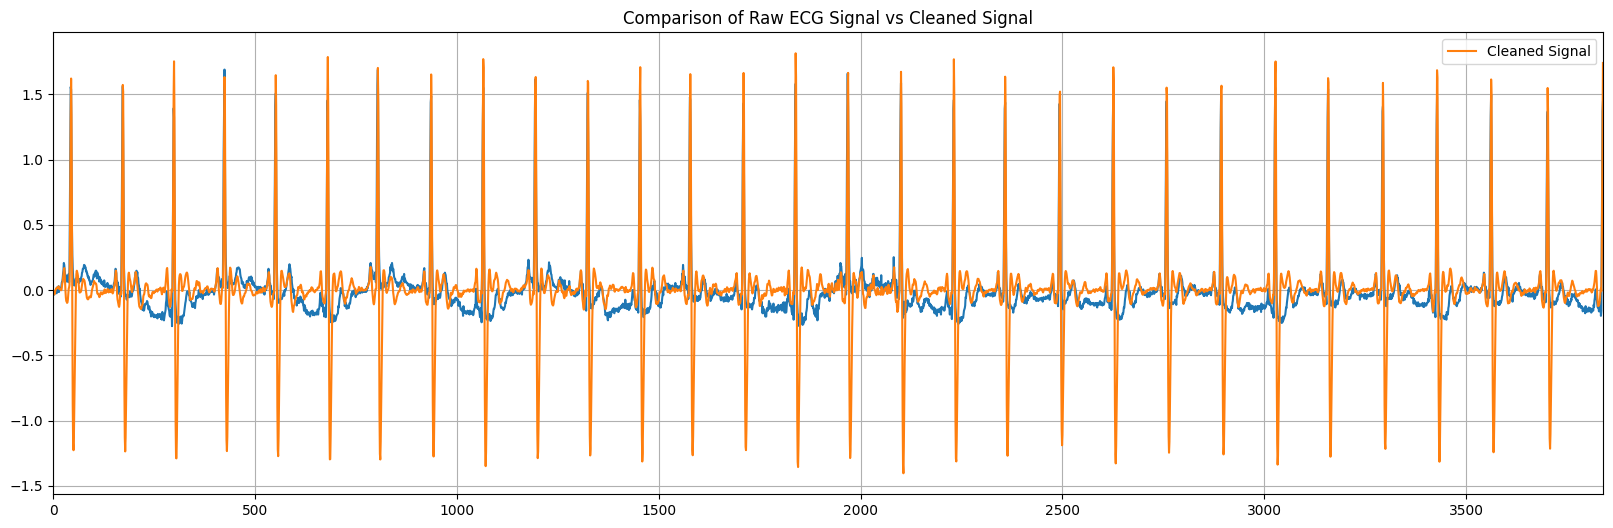

In [10]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

ax.grid(True)

# Plot the raw ECG signal multiplied by 2 (assuming 'test_scan' is a DataFrame)
ax.plot(list(filtered_NSRs.iloc[17][:-8]))

clean_signal=ecg_clean(list(2*filtered_NSRs.iloc[17][:-8]),
                       sampling_rate=128,
                       method='pantompkins1985')

ax.plot(clean_signal, label='Cleaned Signal')

#Set the title for the plot
ax.set_title("Comparison of Raw ECG Signal vs Cleaned Signal", loc="center")


ax.set_xlim(0,3840)
# Add a legend
ax.legend()

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

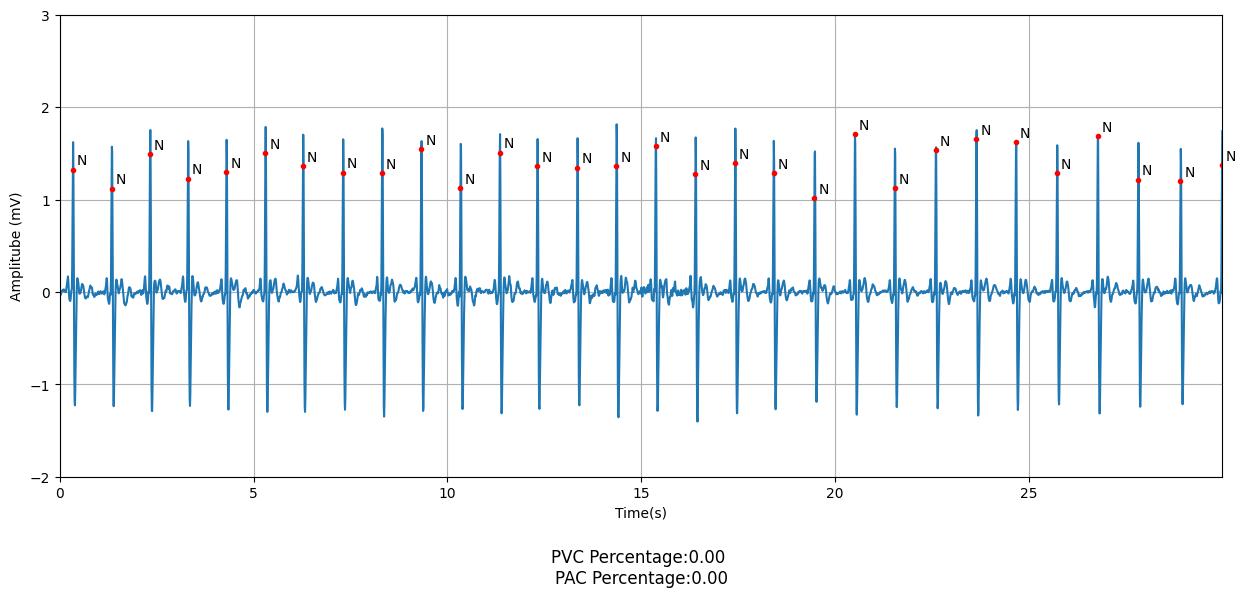

In [11]:
plot_signal_with_annotation(clean_signal,
                            filtered_NSRs.iloc[17]['beat_annotation_symbols'],
                            filtered_NSRs.iloc[17]['annotated_samples'],128,
                             'r.', figsize=(15, 6)) 

In [12]:
get_combined_beat_image(signal=clean_signal,
                        bpm=filtered_NSRs.iloc[17]['avg_heart_rate'],
                        voltage_range=[-3, 3],
                        folder_name='Transformed_Image',
                        img_name=f'Sample_Transfomred_Image')

'Transformed_Image\\Sample_Transfomred_Image.jpg'

<Figure size 1800x1800 with 0 Axes>